# Practical 1
## Romain Ducarrouge
### 15201291

# <font color='red'> Question1 </font>

In [1]:
#Get a PDF file, save it to disk.
import requests
import numpy as np
import nltk
import re

url='http://www.ucd.ie/universityrelations/about-ucd/docs/UCD_Profile_v02l.pdf'
# University College Dublin – By Numbers

r = requests.get(url)

#PDF is a binary format. Use request.content instead of request.text
#Write binary content on disk in file named 'thinkpython.pdf'
with open("OriginalUCD.pdf", "wb") as pdffile:
    print(r.content[:500])
    pdffile.write(r.content)

# Using 'pdftotext' I extract the pdf content & create a txt file with same content
# use "\" for windows directory vs "/" for mac directory
! C:\Users\Romain\Anaconda3\envs\comp47350\xpdfbin-win-3.04\bin64\pdftotext OriginalUCD.pdf Practical1.txt

b'%PDF-1.5\r%\xe2\xe3\xcf\xd3\r\n476 0 obj\r<</Linearized 1/L 109027/O 478/E 62525/N 5/T 108612/H [ 1245 279]>>\rendobj\r             \r\n495 0 obj\r<</DecodeParms<</Columns 4/Predictor 12>>/Filter/FlateDecode/ID[<7199B08D158FC44998B134A29C48C786><6EF4A3F92C280347A193D2B101F0ADB7>]/Index[476 291]/Info 475 0 R/Length 110/Prev 108613/Root 477 0 R/Size 767/Type/XRef/W[1 2 1]>>stream\r\nh\xdebbd\x10``b`}\x02$\x18\xdb\x80\x04\xd3n \xc1\xe3\x02$x\xff\x02\t\x96\x00 \xc1\xbc\x18D\xf0\x83\x88u \xe21H\xdd\x07\x90\xac\x02\x90\x90\xaf\x05\xb1\xf6\x01\t\xce\xdf@\x82+\nd\x942\xc8\xd0~ \xd1+\xc9\xc0\xc4\xc8\x98\rd100\x8e\x12#\x88\xe0\x9e;\x1a\x06#\x8d\xf86\x1a\xe74#\xfe3\xff\xdd\r\x10`\x00\xbb\xed\x14)\r\nendstream\rendobj\rstartxref\r'


### QUESTION 1.a

In [2]:
from nltk.tokenize import RegexpTokenizer

#Load data into object text
with open('Practical1.txt', 'r', encoding='ISO-8859-1') as file:
    text = file.read()


# Replace the target string
text2 = text.replace('ucd', 'university college dublin')
text2 = text.replace('UCD', 'university college dublin')

# using RegEx to remove punctuations
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text2)

print(words[:30])

print("Number of words: ", len(words))

word_frequency = nltk.FreqDist(words)
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))

['University', 'College', 'Dublin', 'PROFILE', 'University', 'College', 'Dublin', 'By', 'Numbers', '1', '19', '25', '40', '94', '122', '133', '450', '460', '1', '828', '1', '854', '3', '095', '4', '645', '6', '895', '7', '234']
Number of words:  2082

Most frequent top-10 words:  [('of', 112), ('university', 106), ('college', 98), ('dublin', 96), ('and', 84), ('the', 57), ('School', 37), ('University', 35), ('to', 27), ('in', 27)]


After tokenising the text using *word_tokenize()*, we can see that there are still some words that do not provide meaningful information such as:
- &
- numbers (1,2,3)
- preopositions: of, the, on
- punctuations (.,)

Here the tokenisation is simply a step used to split the text from a whole text into either a list of sentences or into a list of individual words and characters.

One issue arising with this is the fact that counting words would duplicate observations for words that are capitalized and those that are not.
A second issue with the current format of the text data is that various declinations of the same word would all count as one specific word rather than count toward one same common root word (a lemma).


## Question 1.b


Most frequent top-10 words:  [('university', 142), ('college', 117), ('dublin', 116), ('school', 38), ('students', 27), ('research', 23), ('ireland', 20), ('irish', 16), ('programmes', 13), ('education', 13)]


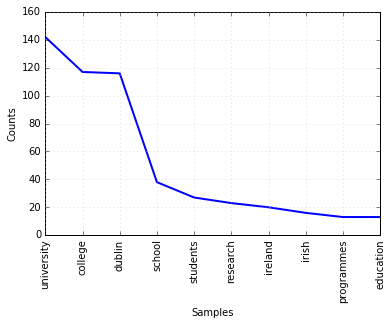

Number of words:  1477


In [3]:
%matplotlib inline

UCD = nltk.Text(words)

# convert all text to lowercase and remove numbers
UCD = [w.lower() for w in UCD if w.isalpha()] 

stopset = set(nltk.corpus.stopwords.words('english'))
stopset.update(("'s", 'in','to','I','I','a','and','So',"isn't","aren't",'arnt','this','when','it','many','so','cant','yes','no','these'))

UCD = [w for w in UCD if not w in stopset]

word_frequency2 = nltk.FreqDist(UCD)

print("\nMost frequent top-10 words: ", word_frequency2.most_common(10))
word_frequency2.plot(10) 

print("Number of words: ", len(UCD))

We have now normalized the text by doing several things:
- 1) Lower the entire text in order to not account for both 'School' and 'school' using the function *lower()*
- 2) we have removed all the numbers by using the *isalpha()* function
- 3) we also used the NLTK stopwords in order to remove the words that did not provide much meaningful data.
- 4) we have updated the list of stopwords in order to account for the remaining words left in our data that would not be useful.

We now have almost 40% less words in our dataset due to these steps. The data may be smaller but at least we have gotten rid of the noise and are left with much more valuable information now.

**In the present scenario there should be no real need for checking and fixing potential misspellings due to the fact that this is a pdf generated by UCD (a reliable source who probably ran some spelling mistake detection before releasing this document) and hence should be grammatically correct (unlike Tweets or Facebook statuses for example which would need to get checked for spelling errors)**

## Question 1.c

In [5]:
POS_UCD = nltk.pos_tag(UCD)

ListNouns = []
ListVerbs = []
ListAdjectives = []

for i in POS_UCD:
    if i[1]=='NN' or i[1]=='NNS' or i[1]=='NNP' or i[1]=='NNPS':
        ListNouns.append(i)
    elif i[1]=='JJ' or i[1]=='JJR' or i[1]=='JJS':
        ListAdjectives.append(i)
    elif i[1]=='VB' or i[1]=='VBD' or i[1]=='VBG' or i[1]=='VBN' or i[1]=='VBP' or i[1]=='VBZ':
        ListVerbs.append(i)
        
print(ListNouns[:10])
print(ListVerbs[:10])
print(ListAdjectives[:10])

[('university', 'NN'), ('college', 'NN'), ('dublin', 'NN'), ('university', 'NN'), ('college', 'NN'), ('dublin', 'NN'), ('numbers', 'NNS'), ('university', 'NN'), ('choice', 'NN'), ('students', 'NNS')]
[('ranking', 'VBG'), ('hectares', 'VBZ'), ('making', 'VBG'), ('woodland', 'VB'), ('won', 'VBD'), ('funded', 'VBN'), ('founded', 'VBD'), ('conferred', 'VBD'), ('science', 'VBP'), ('related', 'VBN')]
[('profile', 'JJ'), ('irish', 'JJ'), ('international', 'JJ'), ('international', 'JJ'), ('top', 'JJ'), ('euro', 'JJ'), ('annual', 'JJ'), ('euro', 'JJ'), ('last', 'JJ'), ('newman', 'JJ')]


Once again here, we have gone one step further in the NLP process and we have identified the function of each word present in the text. We now have the word and its category, such as Noun, Verb, Adjective. This is really helpful as we have a more complete word and a category. For example in the context of a sentiment analysis we could extract the words categorized as adjective in order to assess whether there are mostly positive or negative. We can also extract people or entity's names from the text in order to derive an understanding of what the article talks about.

# <font color='red'> Question 2 </font>

## Question 2.a

In [6]:
url2='https://archives.limsi.fr/Individu/schwenk/English/Research/papers/Schwenk.nnlm.is2004.pdf'
# Neural Network Language Models
# for Conversational Speech Recognition
# by Holger Schwenk and Jean-Luc Gauvain

r2 = requests.get(url2)

#PDF is a binary format. Use request.content instead of request.text
#Write binary content on disk in file named 'thinkpython.pdf'
with open("OriginalPaper.pdf", "wb") as pdffile:
    pdffile.write(r2.content)

# Using 'pdftotext' I extract the Democrat pdf content & create a txt file with same content
# use "\" for windows directory vs "/" for mac directory
! C:\Users\Romain\Anaconda3\envs\comp47350\xpdfbin-win-3.04\bin64\pdftotext OriginalPaper.pdf Practical2.txt
    
with open('Practical2.txt', 'r', encoding='ISO-8859-1') as file:
    paper = file.read()

# using RegEx to remove punctuations
tokenizer = RegexpTokenizer(r'\w+')
words2 = tokenizer.tokenize(paper)

# convert all text to lowercase and remove numbers
words2 = [w.lower() for w in words2 if w.isalpha()] 

stopset = set(nltk.corpus.stopwords.words('english'))
stopset.update(("'s", 'I','I','a','and','So',"isn't","aren't",'arnt','this','when','it','many','so','cant','yes','no','these'))

words2 = [w for w in words2 if not w in stopset]

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem_words2 = [stemmer.stem(wd) for wd in words2]

print(stem_words2[:30])

['neural', 'network', 'languag', 'model', 'convers', 'speech', 'recognit', 'holger', 'schwenk', 'jean', 'luc', 'gauvain', 'limsi', 'cnr', 'bat', 'bp', 'orsay', 'cedex', 'franc', 'schwenk', 'gauvain', 'limsi', 'fr', 'abstract', 'recent', 'grow', 'interest', 'use', 'neural', 'network']


After using the Porter Stemmer on the research paper we can see some irregularities such as the following two:
- recognit
- recogn

In this case one could assume that the first one would be the stem of a noun, while the second one would be the stem of a verb, explaining the differences in result.
That being said, it does not explicitly mention this, this is why it would be nice to pair this step with a POS step in order to know definitevily the use of the word in its context.

Another possible problem with this stemmer is the loss of information, with the word **carri** I do not know what the original word was, and here I am not able to know what it was. It could have been the verb 'carry' with the last 'y' changed to an 'i'. But then if this is the case then why is the word 'probably' transformed into 'probabl'.

It also appears clear that this stemmer does not function well with irregular verbs such as **to be** (am, is, are).

## Question 2.b

In [7]:
# Part of Speech Tagging the text data using nltk function pos_tag()
POS_words2 = nltk.pos_tag(words2)

q2 = nltk.ne_chunk(POS_words2, binary=True)
print(q2[0:30])

[('neural', 'JJ'), ('network', 'NN'), ('language', 'NN'), ('models', 'NNS'), ('conversational', 'JJ'), ('speech', 'NN'), ('recognition', 'NN'), ('holger', 'NN'), ('schwenk', 'JJ'), ('jean', 'JJ'), ('luc', 'NN'), ('gauvain', 'NN'), ('limsi', 'JJ'), ('cnrs', 'NN'), ('bat', 'NN'), ('bp', 'NN'), ('orsay', 'VBP'), ('cedex', 'NN'), ('france', 'NN'), ('schwenk', 'NN'), ('gauvain', 'NN'), ('limsi', 'JJ'), ('fr', 'NN'), ('abstract', 'NN'), ('recently', 'RB'), ('growing', 'VBG'), ('interest', 'NN'), ('using', 'VBG'), ('neural', 'JJ'), ('networks', 'NNS')]


In this example we can establish that this process is limited, we can identify the fact that the First Name 'Jean' is here tagged as 'JJ', an **adjective**.

Also, it appears that while most words get truncated to their lemmas, the word *'conversational'* remains the same and does not get counted toward any other *'convers'* root word.

We can also see that the verb use is conjugated to *'using'* in our text and after doing the POS tagging and Lemmatizer, the words 'using', 'modeling' are still present. One could have expectd it to become 'us / VBG' or 'use / VBG' as the VBG is providing the context that this is a verb.

In [33]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
LemWord = wnl.lemmatize(str(q2))

# investigate the Lemmatized data 
print(LemWord[0:139])

# compare results of Stemming and Lemmatizer processes
i=60
while i<80:
    print(str(stem_words2[i]) + '\t\t' + str(q2[i]),)
    i+=1


(S
  neural/JJ
  network/NN
  language/NN
  models/NNS
  conversational/JJ
  speech/NN
  recognition/NN
  holger/NN
  schwenk/JJ
  jean/JJ

task		('tasks', 'NNS')
limit		('limited', 'JJ')
amount		('amount', 'NN')
domain		('domain', 'NN')
train		('training', 'NN')
data		('data', 'NNS')
avail		('available', 'JJ')
model		('modeling', 'VBG')
convers		('conversational', 'JJ')
speech		('speech', 'JJ')
paper		('paper', 'NN')
analyz		('analyze', 'NN')
gener		('generalization', 'NN')
behavior		('behavior', 'IN')
neural		('neural', 'JJ')
network		('network', 'NN')
lm		('lm', 'NN')
domain		('domain', 'NN')
train		('training', 'NN')
corpora		('corpora', 'NN')


Above we can see a list of 20 different results from the Stemming process (*on the left*) and from the Lemmatizer process (*on the right*).

It is clear that the Lemmatizer provides a much clearer contextual information. For example in the example of *'training'*, the Stemming process returns **'train'** while the Lemmatizer returns **training, NN**. Here we can see that the Stemmer returns only the root which can be useful, but it also cuts off a large part of important data. The Lemmatizing process returns the word as well as its category. That way the data returned is more accurate, word is clearer, and it also adds some contextual information.

*'The real difference between stemming and lemmatization is threefold:*
- Stemming reduces word-forms to (pseudo)stems, whereas lemmatization reduces the word-forms to linguistically valid lemmas. This difference is apparent in languages with more complex morphology, but may be irrelevant for many IR applications;
- Lemmatization deals only with inflectional variance, whereas stemming may also deal with derivational variance;
- In terms of implementation, lemmatization is usually more sophisticated (especially for morphologically complex languages) and usually requires some sort of lexica. Satisfatory stemming, on the other hand, can be achieved with rather simple rule-based approaches.'* -http://stackoverflow.com/questions/1787110/what-is-the-true-difference-between-lemmatization-vs-stemming

# <font color='red'> Question 3 </font>

In [39]:
from bs4 import BeautifulSoup

result = requests.get("http://programminghistorian.org/lessons/intro-to-beautiful-soup")

# HTTP Status Code for request
if result.status_code==200:
    print("OK")
elif result.status_code >= 400:
    print("Bad Request or Error")
else:
    pass

c = result.content

soup = BeautifulSoup(c)
print(soup.prettify()[0:1000])

OK
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="Intro to Beautiful Soup" name="citation_title"/>
  <meta content="Jeri Wieringa" name="citation_author"/>
  <meta content="2012-12-30" name="citation_publication_date"/>
  <meta content="Programming Historian" name="citation_journal_title"/>
  <meta content="http://programminghistorian.org/lessons/intro-to-beautiful-soup" name="citation_public_url"/>
  <!-- Mobile viewport optimized: h5bp.com/viewport -->
  <meta content="width=device-width" name="viewport"/>
  <!--Font awesome CDN -->
  <link href="//maxcdn.bootstrapcdn.com/font-awesome/4.1.0/css/font-awesome.min.css" rel="stylesheet"/>
  <link href="http://fonts.googleapis.com/css?family=Lato:300,400,700|Crete+Round" rel="stylesheet" type="text/css"/>
  <link href="/css/style.css" rel="stylesheet"/>
  <link href="/css/github.css" rel="stylesheet"/>
  <link href="/feed.xml" rel="alternate" type

C:\Users\Romain\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [50]:
# get the title of the page
titleTag = soup.html.head.title
print(titleTag)

<title>Intro to Beautiful Soup | Programming Historian</title>


In [63]:
# get the author details
author = soup.find_all("div", class_="author-info")

x = str(author).split()
final = []

for elem in x:
    if elem[0] != '<' or elem[0] != '[':
        final.append(elem)
    
print(final)

['[<div', 'class="author-info">', '<p', 'class="author-name">About', 'the', 'author</p>', '<div', 'class="author-description"><p>', 'Jeri', 'Wieringa', 'is', 'the', 'digital', 'publishing', 'production', 'lead', 'for', 'the', 'George', 'Mason', 'University', 'Libraries', 'and', 'a', 'doctoral', 'candidate', 'in', 'history', 'at', 'George', 'Mason', 'University.', '</p>', '</div>', '</div>]']


In [66]:
# get the website citation info
citation = soup.find_all("div", class_="citation-info")
print(str(citation).split())

['[<div', 'class="citation-info">', '<p', 'class="citation-head">Suggested', 'Citation</p>', '<div', 'class="suggested-citation">', '<p>', 'Jeri', 'Wieringa', ',', '"Intro', 'to', 'Beautiful', 'Soup,"', '<em>Programming', 'Historian</em>', '(30', 'December', '2012),', 'http://programminghistorian.org/lessons/intro-to-beautiful-soup', '</p>', '</div>', '</div>]']


In [74]:
# get the content of the cite
content = soup.find_all("div", class_="content")
content = (str(content).split())


Most frequent top-10 words:  [('html', 25), ('tags', 20), ('data', 19), ('file', 18), ('beautiful', 14), ('csv', 14), ('want', 12), ('table', 12), ('soup', 12), ('using', 12)]


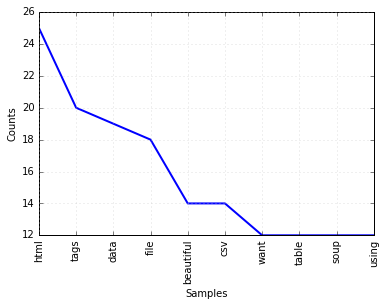

Number of words:  792


In [73]:
# perform some normalsation and plotting of most common words in this article content
content2 = nltk.Text(content)

# convert all text to lowercase and remove numbers
content2 = [w.lower() for w in content2 if w.isalpha()] 

stopset = set(nltk.corpus.stopwords.words('english'))
stopset.update(("'s", 'in','to','I','I','a','and','So',"isn't","aren't",'arnt','this','when','it','many','so','cant','yes','no','these'))

content2 = [w for w in content2 if not w in stopset]

word_frequency3 = nltk.FreqDist(content2)

print("\nMost frequent top-10 words: ", word_frequency3.most_common(10))
word_frequency3.plot(10) 

print("Number of words: ", len(content2))